# Number of Visitors to Japan

**Name:** Simon Berhe  
**ID:** 100866376

---

## **Exploring Annual and Monthly Trends in the Number of Visitors to Japan by Country**

### Introduction

For this project, I dove into the annual and monthly statistics of visitors to Japan from various countries. The dataset was sourced from Kaggle, and the primary objective is to analyze and understand the trends in international visitors to Japan over the years. The data set goes from the year 2017 up until 2023 with key attributes being "Year", "Month", "Country", and "Number of Visitors". 

I chose this dataset for exploration because it resonates with my interest in visiting Japan and experiencing its culture. Japan was always a country I wanted to go to as a kid, and diving into the dataset allowed me to gain insights into the diverse amount of people from around the world who have visited it. Analyzing the patterns and trends in international visitors does not only benefit me however as it provides valuable information to anyone interested in the global appeal of Japan as a travel destination.



### Key Questions

The main questions that looked interesting to me given the data that I obtained were first, what are the top countries that significantly contribute to Japan's annual visitors? Secondly, Are the any seasonal or recurring patterns that occur in the given dataset? And lastly, does the number of people visiting from different countries change in noticeable ways each year? These questions overall aim to unveil the dynamics of international tourism in Japan, and the answers can help people who love to travel, those who make important decisions, and those who work in the tourism industry. 


To Summarize, the questions are as follows:

1. **What are the top countries that significantly contribute to Japan's annual and monthly visitors?**

2. **Are the any seasonal or recurring patterns that occur in the given dataset?**

3. **Does the number of people visiting from different countries change in noticeable ways each year?**






### Analysis













**Importing the Data**

Here I used `pandas` library to import the csv that was on my local computer and hold it in a variable called japan


```python

In [1]:
import pandas as pd
japan = pd.read_csv('Number of foreign visitors to Japan every Year.csv') # Imported the data using pandas

**Understanding the data**

Just For understanding, I wanted to see what the first few tables of the data were along with the shape of it so I just displayed some of the data on the screen.


In [2]:
# Understanding the data

print(japan.shape) # Displayed the shape of the data
japan  # Displayed the first few tables of the data

(17052, 4)


,Country/Area,Month,Year,Visitor
0,Afghanistan,Jan.,2017,233
1,Afghanistan,Feb.,2017,196
2,Afghanistan,Mar.,2017,192
3,Afghanistan,Apr.,2017,259
4,Afghanistan,May,2017,228
...,...,...,...,...
17047,Zimbabwe,Aug.,2023,0
17048,Zimbabwe,Sep.,2023,0
17049,Zimbabwe,Oct.,2023,0
17050,Zimbabwe,Nov.,2023,0


**Cleaning the data**

In the code below, just in case there were duplicate codes in the dataset I made sure to remove them, along with renaming the columns to make the visuals look a bit tidier. Also, I found that in my CSV file, there were countries named unknown, so I removed them as well.


In [3]:
# cleaning the data
japan = japan.drop_duplicates() # Remove duplicate rows
japan.columns = ["Country", "Month", "Year", "Number of Visitors"] # Renamed the columns
japan_cleaned = japan[japan['Country'] != 'Unknown'] # Removed rows with unknown country
japan.head()

,Country,Month,Year,Number of Visitors
0,Afghanistan,Jan.,2017,233
1,Afghanistan,Feb.,2017,196
2,Afghanistan,Mar.,2017,192
3,Afghanistan,Apr.,2017,259
4,Afghanistan,May,2017,228


**Exploratory Data Analysis**

Here I first checked to see the amount of missing values that were found throughout the dataset. Then dropped all the empty columns and rows. Next, I grouped the data by country calculated the total number of visitors for each country, and displayed the first 25 (for simplicity on the graph). Then I used `seaborn` and `mathplotlib` to set up the facet grid and added the title and labels to plot the graph. Below is the relationship between the Number of Visitors to the Year.

```python


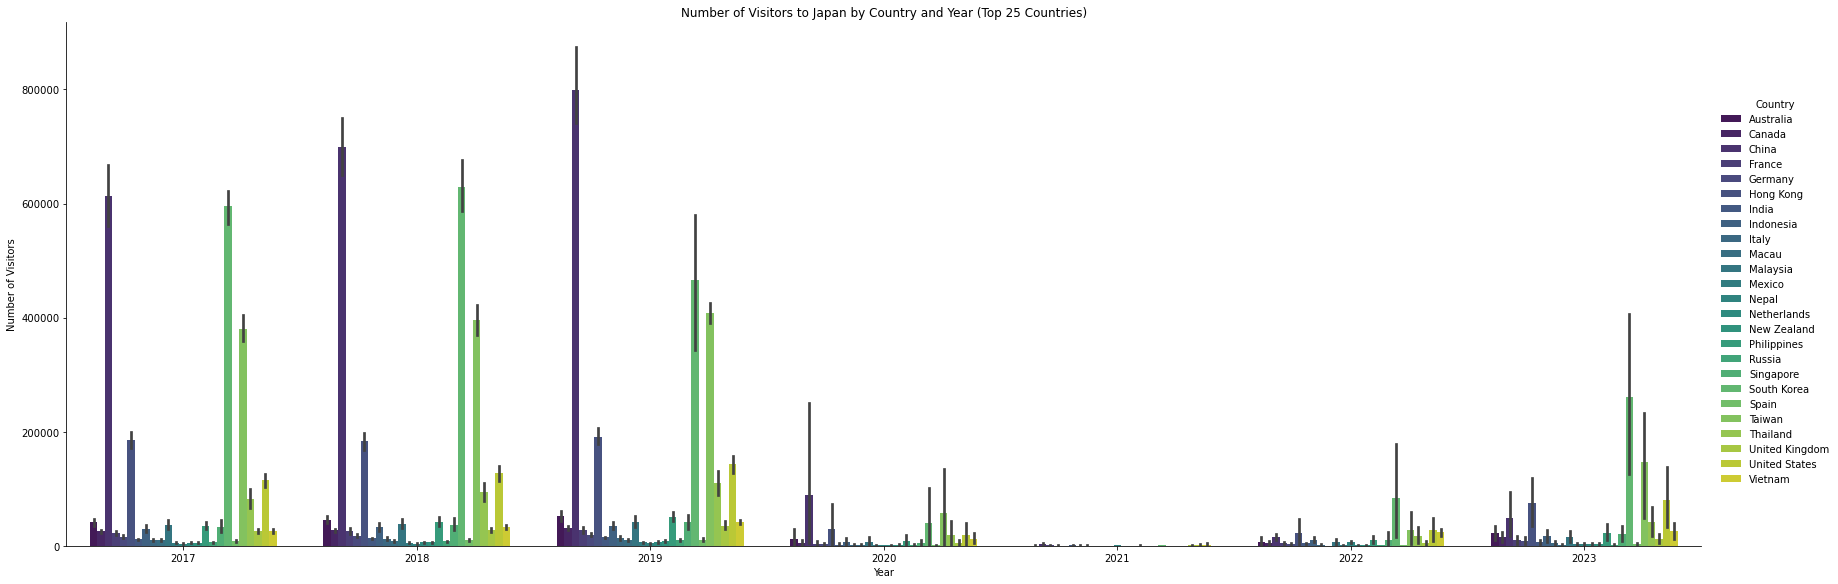

In [4]:
#EDA

#Descriptive Statistics
japan.describe()

# Checking for missing values
japan.isnull().sum() 

# Dropping empty rows and columns 
japan = japan.dropna(axis=1, how='all')
japan = japan.dropna(axis=0, how='all')  



import seaborn as sns
import matplotlib.pyplot as plt

# Plotting the number of visitors by year
total_visitors_by_country = japan.groupby('Country')['Number of Visitors'].sum().reset_index()
top_25_countries = total_visitors_by_country.nlargest(25, 'Number of Visitors')['Country']
japan_top_25 = japan[japan['Country'].isin(top_25_countries)]


g = sns.catplot(
    x='Year', 
    y='Number of Visitors', 
    hue='Country', 
    data=japan_top_25, 
    kind='bar',
    height=8,
    aspect=3,  
    palette='viridis'  
)


# Displaying the title and axis labels
plt.title('Number of Visitors to Japan by Country and Year (Top 25 Countries)')
plt.xlabel('Year')
plt.ylabel('Number of Visitors')


plt.show()


Here is another graph just to check the relationship between the Number of Visitors per Country to Month. (Again using the top 25 countries for less clutter on the screen)

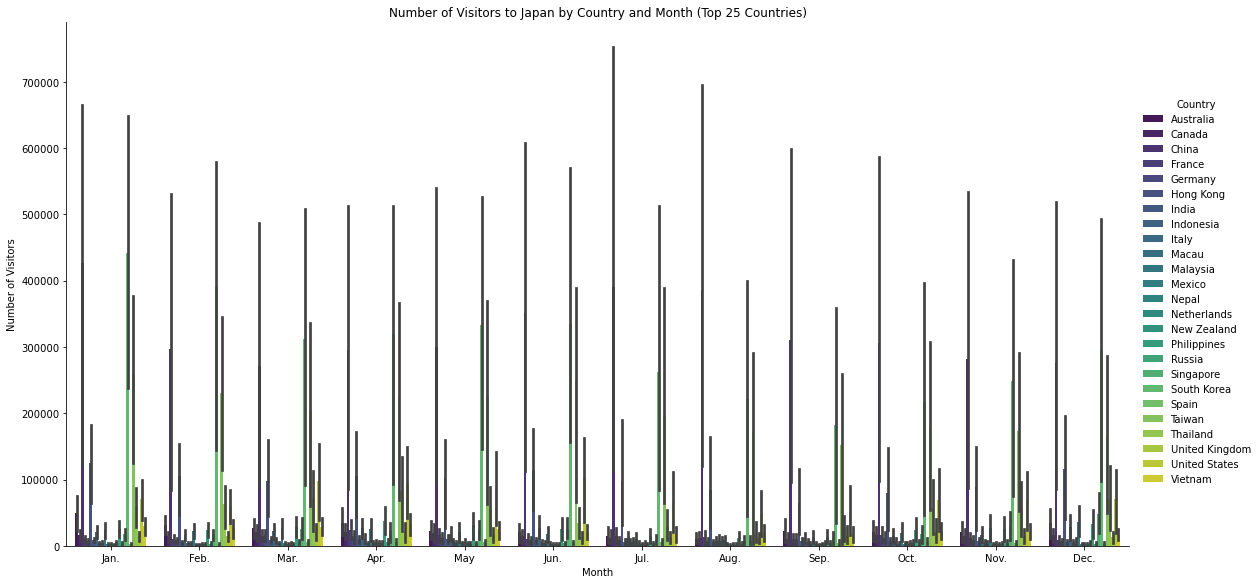

In [5]:




# Set up the facet grid
g = sns.catplot(
    x='Month', 
    y='Number of Visitors', 
    hue='Country', 
    data=japan_top_25, 
    kind='bar',
    height=8,
    aspect=2,  # Adjust the aspect ratio for better visualization
    palette='viridis'  # Adjust the color palette as needed
)

# Add title and labels
plt.title('Number of Visitors to Japan by Country and Month (Top 25 Countries)')
plt.xlabel('Month')
plt.ylabel('Number of Visitors')



# Show the plot
plt.show()

Here is the relationship between the Number of Visitors to Japan by Country and Year however it is the 25 countries that have visited Japan the least

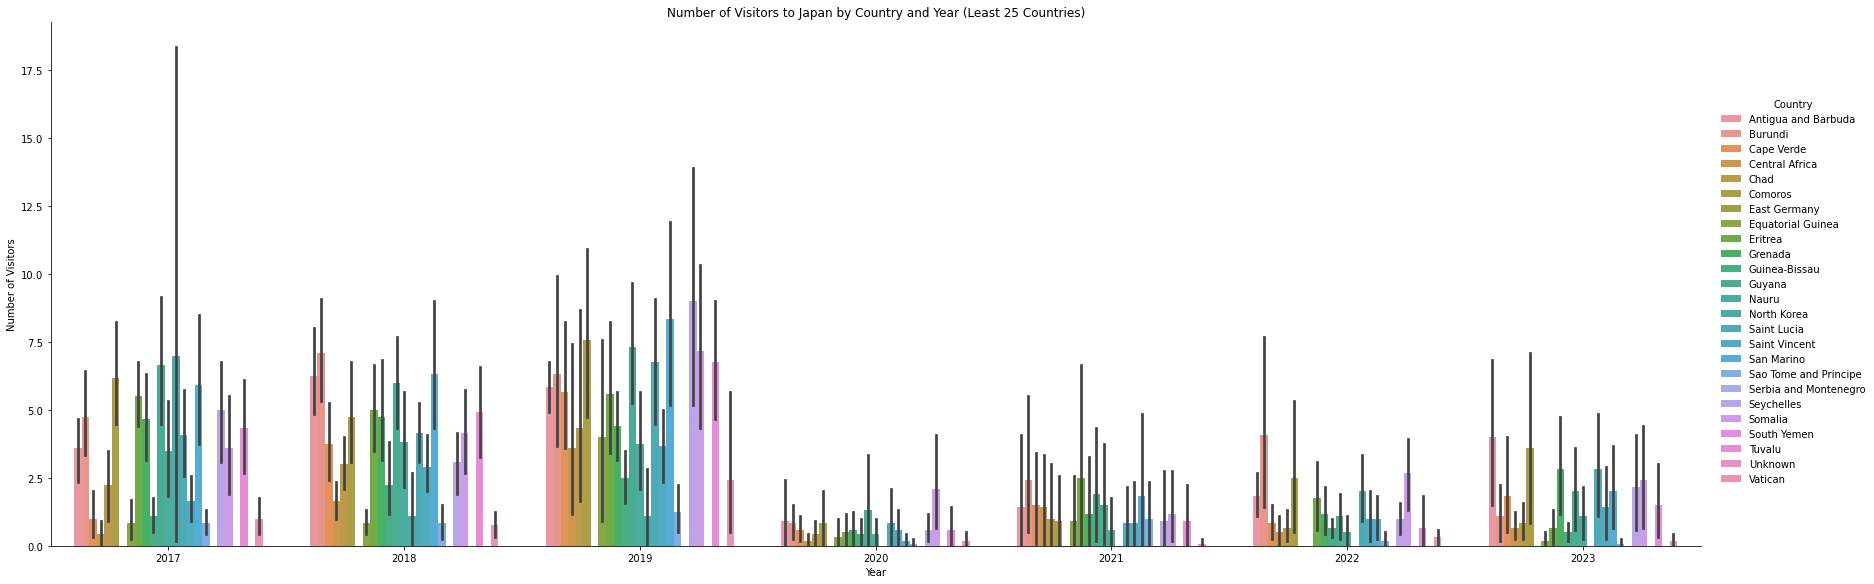

In [6]:

# Set up the facet grid
last_25_countries = total_visitors_by_country.nsmallest(25, 'Number of Visitors')['Country']
japan_last_25 = japan[japan['Country'].isin(last_25_countries)]


g = sns.catplot(
    x='Year', 
    y='Number of Visitors', 
    hue='Country', 
    data=japan_last_25, 
    kind='bar',
    height=8,
    aspect=3,  
)



# Add title and labels
plt.title('Number of Visitors to Japan by Country and Year (Least 25 Countries)')
plt.xlabel('Year')
plt.ylabel('Number of Visitors')


plt.show()

And lastly, here is the relationship between the Number of Visitors to Japan by Country and Month however and it is the 25 countries that visited the least.


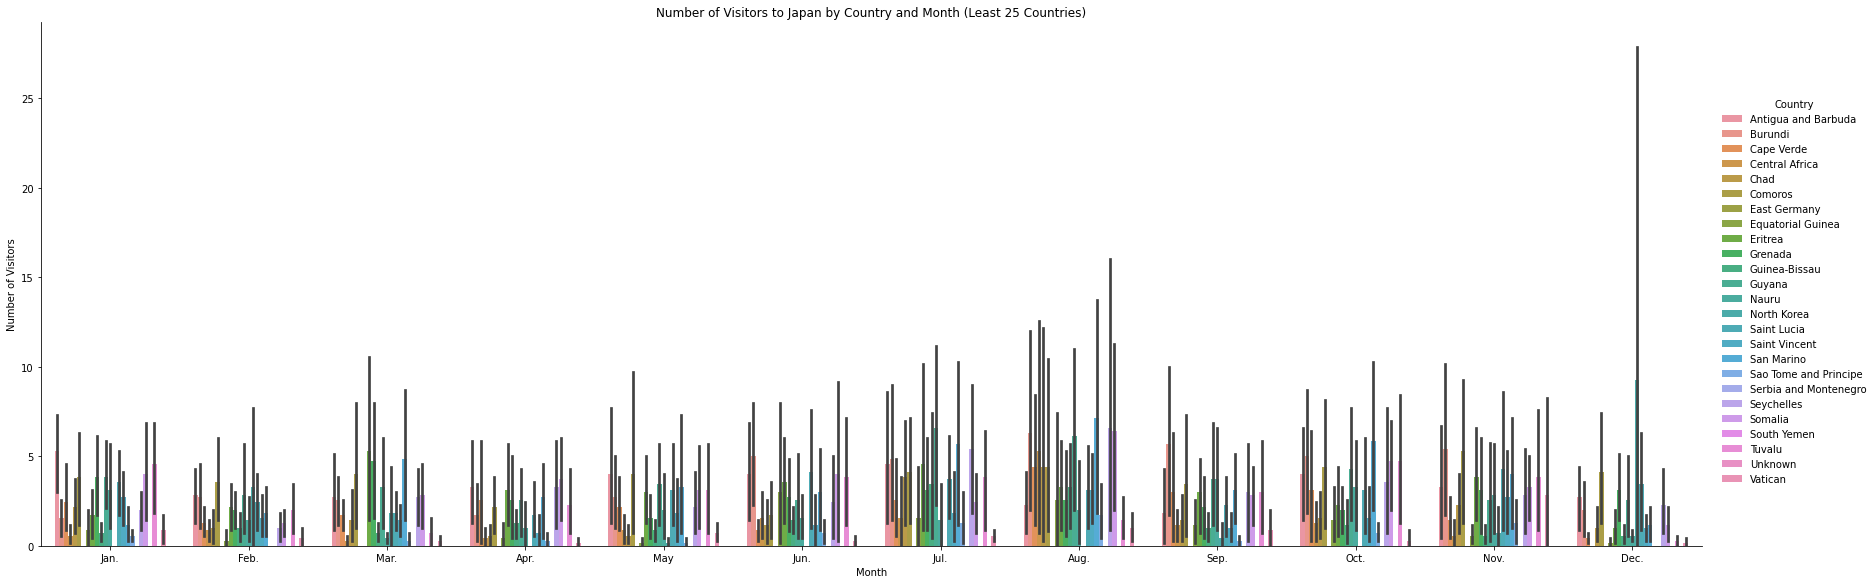

In [7]:
# Set up the facet grid
g = sns.catplot(
    x='Month', 
    y='Number of Visitors', 
    hue='Country', 
    data=japan_last_25, 
    kind='bar',
    height=8,
    aspect=3,  
)



# Add title and labels
plt.title('Number of Visitors to Japan by Country and Month (Least 25 Countries)')
plt.xlabel('Month')
plt.ylabel('Number of Visitors')


plt.show()

### Discussion



Upon examining the data provided, it is certain that there was a significant decline in the number of people visiting Japan in 2020 and 2021. This is likely due to the global impact of the COVID-19 pandemic which resulted in many lockdown measures. Additionally, the second graph depicting the correlation between the number of visitors and months highlights a peak in travel during July and August, indicating that these months, typically associated with summer, attract the highest number of visitors. Also, from all the different Countries that were shown in the dataset. The top countries with the most number of visitors were the United States, Australia, Russia, Spain, and China. These results make sense since these countries have a high population that travel around the world frequently. Finally, on the graphs that compare the number of visitors to the year, it is clear that the number of visitors to Japan has been decreasing over the years. The decline in the number of visitors over the years suggests a shift in international travel patterns. Various factors such as economic conditions and global health crises, as evidenced by the sharp decline in 2020 and 2021, contribute to these fluctuations. Overall the data was very interesting to look at and I learned a lot about the different countries that visit Japan and the trends that occur in the data.


### Reference


https://www.kaggle.com/datasets/risakashiwabara/japannumber-of-visitors-to-japan